In [9]:
! sudo apt-get install texlive-latex-recommended
! sudo apt-get install dvipng texlive-latex-extra texlive-fonts-recommended
! wget http://mirrors.ctan.org/macros/latex/contrib/type1cm.zip
! unzip type1cm.zip -d /tmp/type1cm
! cd /tmp/type1cm/type1cm/ && sudo latex type1cm.ins
! sudo mkdir /usr/share/texmf/tex/latex/type1cm
! sudo cp /tmp/type1cm/type1cm/type1cm.sty /usr/share/texmf/tex/latex/type1cm
! sudo texhash

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  dvisvgm fonts-droid-fallback fonts-lmodern fonts-noto-mono fonts-urw-base35
  libfontenc1 libgs9 libgs9-common libharfbuzz-icu0 libidn11 libijs-0.35
  libjbig2dec0 libkpathsea6 libptexenc1 libsynctex2 libteckit0 libtexlua53
  libtexluajit2 libwoff1 libzzip-0-13 lmodern poppler-data t1utils tex-common
  texlive-base texlive-binaries texlive-latex-base xfonts-encodings
  xfonts-utils
Suggested packages:
  fonts-noto fonts-freefont-otf | fonts-freefont-ttf fonts-texgyre
  poppler-utils ghostscript fonts-japanese-mincho | fonts-ipafont-mincho
  fonts-japanese-gothic | fonts-ipafont-gothic fonts-arphic-ukai
  fonts-arphic-uming fonts-nanum debhelper gv | postscript-viewer perl-tk xpdf
  | pdf-viewer xzdec texlive-latex-base-doc texlive-latex-recommended-doc
  texlive-luatex texlive-pstricks
The following NEW packages will be installed:
  dvis

In [10]:
!apt install cm-super

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  cm-super-minimal pfb2t1c2pfb
The following NEW packages will be installed:
  cm-super cm-super-minimal pfb2t1c2pfb
0 upgraded, 3 newly installed, 0 to remove and 13 not upgraded.
Need to get 24.5 MB of archives.
After this operation, 59.9 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 cm-super-minimal all 0.3.4-15 [5,811 kB]
Get:2 http://archive.ubuntu.com/ubuntu focal/universe amd64 pfb2t1c2pfb amd64 0.3-11 [9,342 B]
Get:3 http://archive.ubuntu.com/ubuntu focal/universe amd64 cm-super all 0.3.4-15 [18.7 MB]
Fetched 24.5 MB in 3s (9,251 kB/s)
Selecting previously unselected package cm-super-minimal.
(Reading database ... 153495 files and directories currently installed.)
Preparing to unpack .../cm-super-minimal_0.3.4-15_all.deb ...
Unpacking cm-super-minimal (0.3.4-15) ...
Selecting 

In [20]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
plt.rc('font', family='sans-serif')
plt.rc('text', usetex=True)

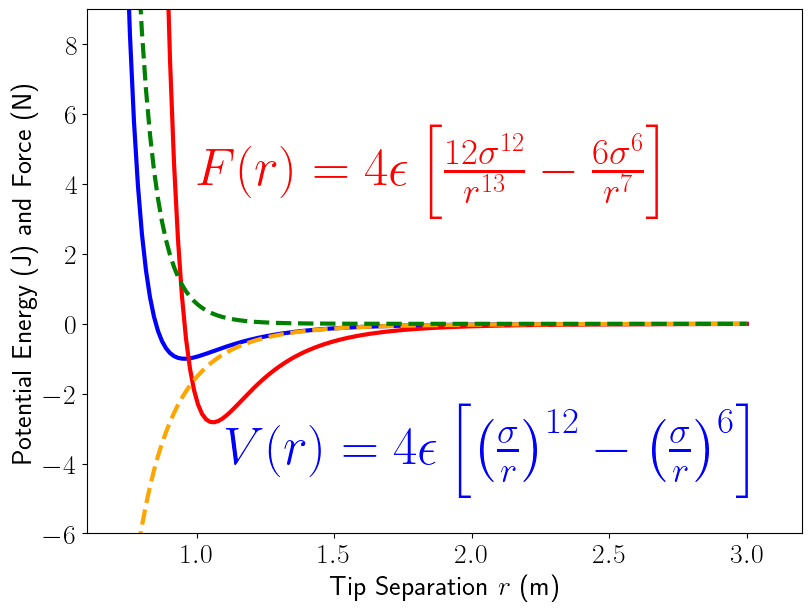

In [21]:
font = {'size': 20}
matplotlib.rc('font', **font)


# Constants
epsilon = 1.0
sigma = 0.85

def attrac(r, epsilon, sigma):
    return -4 * epsilon * (sigma / r)**6

def repuls(r, epsilon, sigma):
  return 4 * epsilon * (sigma / r)**12

def lennard_pot(r):
    return attrac (r, epsilon, sigma) + repuls(r, epsilon, sigma)

def lennard_force(r, epsilon, sigma):
    return  (48 * epsilon * sigma ** 12 / r ** 13) + (-24 * epsilon * (r ** 6) * sigma ** 6 / r ** 13)

def alt_force(r, epsilon, sigma):
    return -4*epsilon * ( (-12*sigma**12) / r**13  +  6*(sigma**6 / r**7))

# Generate r values
r = np.linspace(0.1, 3, 200)

# Calculate potentials and forces
#force = lennard_force(r, epsilon, sigma)


# Plotting
fig = plt.figure(figsize=(8, 6), constrained_layout=True)


plt.plot(r, lennard_pot(r), label='Lennard-Jones Potential', c='b', linewidth=3)
plt.plot(r, lennard_force(r, epsilon, sigma), label='Net Force', c='r', linewidth=3)
plt.plot(r, attrac(r, epsilon, sigma), '--', label='van der Waal', c='orange', linewidth=3)
plt.plot(r, repuls(r, epsilon, sigma), '--', label='Pauli Interaction', c='g', linewidth=3)

plt.xlim([0.6, 3.2])
plt.ylim([-6, 9.])
plt.xlabel('Tip Separation $r$ (m)', fontstyle='normal')
plt.ylabel('Potential Energy (J) and Force (N)', fontstyle='normal')

# plt.legend(fontsize=16)
plt.text(1.1, -4, r'$ V(r) = 4 \epsilon \left[ \left(\frac{\sigma}{r}\right)^{12} - \left(\frac{\sigma}{r}\right)^6 \right] $',
         c='b', fontsize=38)
plt.text(1, 4, r'$ F(r) = 4 \epsilon \left[ \frac{12 \sigma^{12}}{r^{13}} - \frac{6 \sigma^6}{r^7} \right] $',
         c='r', fontsize=38)

plt.savefig('Lennard-Johnes Potential.png', dpi=300)

plt.show()
